In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"fatemehjamaloo","key":"3d2080d94f54a4bb642c7dc76f07c505"}'}

In [ ]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json # set permission

kaggle.json


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"
# /content/gdrive/My Drive/Kaggle is the path where kaggle.json is present in the Google Drive

In [ ]:
!kaggle datasets download -d jangedoo/utkface-new

 99% 329M/331M [00:03<00:00, 74.6MB/s]
100% 331M/331M [00:03<00:00, 93.0MB/s]


In [ ]:
!ls

kaggle.json  utkface-new.zip


In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 64, 64, 3)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 62, 62, 32)   896         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 60, 60, 64)   18496       conv2d[0][0]                     
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 30, 30, 64)   0           conv2d_1[0][0]                   
______________________________________________________________________________________________

In [ ]:
h = model.fit(x_train,[y_train[:,0],y_train[:,1]],validation_data=(x_test,[y_test[:,0],y_test[:,1]]),epochs = 25, batch_size=128,shuffle = True)

Epoch 1/25
1/1 [==============================] - 34s 34s/step - loss: 0.9221 - dense_13_loss: 0.2237 - dense_19_loss: 0.6984 - dense_13_accuracy: 0.1778 - dense_19_accuracy: 0.5556 - val_loss: 1.1733 - val_dense_13_loss: 0.4786 - val_dense_19_loss: 0.6948 - val_dense_13_accuracy: 0.0556 - val_dense_19_accuracy: 0.3889
Epoch 2/25
1/1 [==============================] - 0s 54ms/step - loss: 1.7192 - dense_13_loss: 0.8626 - dense_19_loss: 0.8567 - dense_13_accuracy: 0.1333 - dense_19_accuracy: 0.4667 - val_loss: 0.9376 - val_dense_13_loss: 0.2433 - val_dense_19_loss: 0.6942 - val_dense_13_accuracy: 0.0556 - val_dense_19_accuracy: 0.3889
Epoch 3/25
1/1 [==============================] - 0s 50ms/step - loss: 1.0816 - dense_13_loss: 0.2964 - dense_19_loss: 0.7852 - dense_13_accuracy: 0.1778 - dense_19_accuracy: 0.4444 - val_loss: 0.9366 - val_dense_13_loss: 0.2433 - val_dense_19_loss: 0.6933 - val_dense_13_accuracy: 0.0556 - val_dense_19_accuracy: 0.5000
Epoch 4/25
1/1 [=====================

In [ ]:
x_train.shape

(45, 64, 64, 3)

In [ ]:
trainY.shape


(45, 2, 2)

In [ ]:
import tensorflow as tf
from keras.optimizers import SGD
from keras.losses import categorical_crossentropy
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
from keras.utils import np_utils
trainY=np_utils.to_categorical(y_train)
testY=np_utils.to_categorical(y_test)
TrainX=x_train.T

In [ ]:
TrainX.shape



(3, 64, 64, 45)

In [ ]:
trainY.shape

(45, 2, 2)

Epoch 1/10
469/469 [==============================] - 1s 2ms/step - loss: 11.0796 - acc: 0.1059
Epoch 2/10
469/469 [==============================] - 1s 2ms/step - loss: 2.3076 - acc: 0.1144
Epoch 3/10
469/469 [==============================] - 1s 2ms/step - loss: 2.3016 - acc: 0.1097
Epoch 4/10
469/469 [==============================] - 1s 2ms/step - loss: 2.3002 - acc: 0.1131
Epoch 5/10
469/469 [==============================] - 1s 2ms/step - loss: 2.2994 - acc: 0.1128
Epoch 6/10
469/469 [==============================] - 1s 2ms/step - loss: 2.2990 - acc: 0.1147
Epoch 7/10
469/469 [==============================] - 1s 2ms/step - loss: 2.2988 - acc: 0.1123
Epoch 8/10
469/469 [==============================] - 1s 2ms/step - loss: 2.2992 - acc: 0.1125
Epoch 9/10
469/469 [==============================] - 1s 2ms/step - loss: 2.2990 - acc: 0.1118
Epoch 10/10
469/469 [==============================] - 1s 2ms/step - loss: 2.2983 - acc: 0.1138


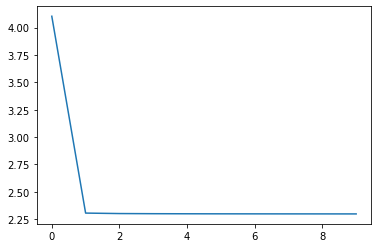

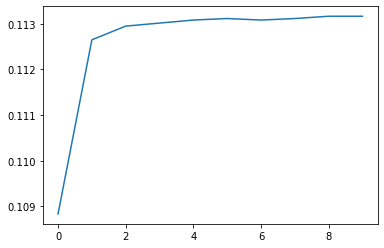

In [ ]:
import tensorflow as tf
from keras.datasets import mnist
from keras.optimizers import SGD
from keras.losses import categorical_crossentropy
from keras.models import Sequential
from keras.layers import Dense

(train_x,train_y),(test_x,test_y)=mnist.load_data()

trainX=train_x.reshape((784,60000))
testX=test_x.reshape((784,10000))


model=Sequential()
model.add(Dense(units=500,activation='relu'))
model.add(Dense(units=100,activation='relu'))
model.add(Dense(units=10,activation='softmax'))
from keras.utils import np_utils
trainY=np_utils.to_categorical(train_y)
testY=np_utils.to_categorical(test_y)
model.compile(optimizer=SGD(lr=0.001),metrics='acc',loss=categorical_crossentropy)
network_hist=model.fit(trainX.T,trainY,batch_size=128,epochs=10)
loss_hist=network_hist.history['loss']
#valloss_hist=network_hist.history['val_loss']

acc_hist=network_hist.history['acc']
#valacc_hist=network_hist.history['val_acc']

import matplotlib.pyplot as plt
plt.plot(loss_hist)
#plt.plot(valloss_hist)
plt.xlabel='epoch'
plt.ylabel='loss'
plt.figure()
plt.plot(acc_hist)
#plt.plot(valacc_hist)
plt.xlabel='epoch'
plt.ylabel='acc'

Mounted at /content/gdrive
Age: 62
lisage [5, 7, 6, 8, 7, 1, 1, 1, 1, 1, 7, 6, 4, 7, 8, 5, 5, 5, 6, 10, 9, 10, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 2, 2, 5, 3, 1, 3, 2, 2, 2, 2, 6, 4, 6, 5, 3, 3, 5, 3, 4, 5, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


array([[[ 67,  70,  85],
        [ 68,  71,  86],
        [ 60,  63,  78],
        ...,
        [ 61,  64,  69],
        [ 65,  68,  72],
        [ 67,  71,  72]],

       [[ 65,  68,  82],
        [ 66,  69,  83],
        [ 60,  63,  77],
        ...,
        [ 59,  62,  66],
        [ 60,  64,  65],
        [ 61,  66,  64]],

       [[ 65,  70,  79],
        [ 66,  71,  80],
        [ 59,  64,  73],
        ...,
        [ 57,  62,  61],
        [ 55,  60,  59],
        [ 53,  59,  54]],

       ...,

       [[ 75,  79, 114],
        [ 34,  35,  72],
        [ 75,  74, 114],
        ...,
        [ 93,  94, 127],
        [ 59,  63,  88],
        [ 90,  95, 117]],

       [[ 56,  57,  92],
        [ 51,  50,  89],
        [115, 109, 150],
        ...,
        [ 83,  83, 119],
        [ 81,  83, 112],
        [ 78,  82, 107]],

       [[ 49,  48,  84],
        [ 68,  63, 102],
        [130, 122, 163],
        ...,
        [ 59,  58,  97],
        [105, 107, 138],
        [ 70,  73, 101]]

training_padded [[[[0.79607844 0.79215688 0.73725492]
   [0.78823531 0.78431374 0.72941178]
   [0.78823531 0.78431374 0.72941178]
   ...
   [0.16470589 0.1882353  0.2       ]
   [0.25882354 0.29019609 0.29019609]
   [0.65098041 0.68627453 0.67450982]]

  [[0.79607844 0.79215688 0.73725492]
   [0.78823531 0.78431374 0.72941178]
   [0.78823531 0.78431374 0.72941178]
   ...
   [0.22745098 0.25098041 0.27058825]
   [0.21568628 0.24313726 0.25490198]
   [0.35686275 0.3882353  0.38431373]]

  [[0.79607844 0.79215688 0.73725492]
   [0.78823531 0.78431374 0.72941178]
   [0.78823531 0.78431374 0.72941178]
   ...
   [0.13333334 0.15686275 0.18431373]
   [0.10196079 0.1254902  0.14901961]
   [0.19215687 0.21960784 0.23137255]]

  ...

  [[0.96078432 0.96470588 0.95686275]
   [0.95294118 0.95686275 0.95686275]
   [0.92941177 0.94901961 0.95294118]
   ...
   [0.98431373 0.98431373 0.98431373]
   [0.98823529 0.98823529 0.98823529]
   [0.99215686 0.99215686 0.99215686]]

  [[0.90980393 0.9137255  0.9

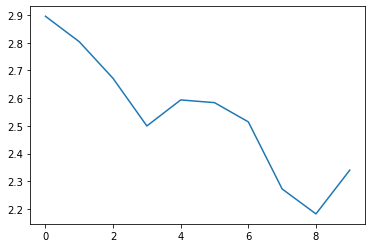

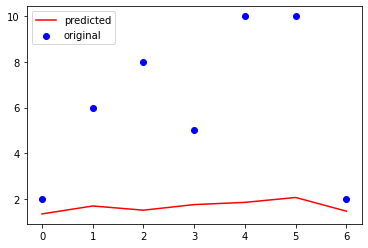

In [ ]:
#using kfold
from google.colab import drive
import os
import cv2
import numpy as np
import pandas as pd
import os
from google.colab import drive
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.losses import categorical_crossentropy
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.model_selection import train_test_split
import keras
from keras.layers import *
from keras.models import *
from keras import backend as K
import tensorflow as tf


def number_of_class_train(trainlist):
  listofclass=[]
  cunt=[0,0,0,0,0,0,0,0,0,0,0]
  for i in range(len(trainlist)):
    if trainlist[i]==0:
      cunt[0]=cunt[0]+1
    if trainlist[i]==1:
      cunt[1]=cunt[1]+1
    if trainlist[i]==2:
      cunt[2]=cunt[2]+1
    if trainlist[i]==3:
      cunt[3]=cunt[3]+1
    if trainlist[i]==4:
      cunt[4]=cunt[4]+1
    if trainlist[i]==5:
      cunt[5]=cunt[5]+1
    if trainlist[i]==6:
      cunt[6]=cunt[6]+1
    if trainlist[i]==7:
      cunt[7]=cunt[7]+1
    if trainlist[i]==8:
      cunt[8]=cunt[8]+1
    if trainlist[i]==9:
      cunt[9]=cunt[9]+1
    if trainlist[i]==10:
      cunt[10]=cunt[10]+1

  for j in range(11):
    listofclass.append(cunt[j])

  return listofclass




drive.mount('/content/gdrive')
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/select"
path = "/content/gdrive/My Drive/select"
files = os.listdir(path)
size = len(files)

ages = []
genders = []
images =[]
def displayImage(image):
    plt.imshow(image)
    plt.show()

for file in files:

    image = cv2.imread( path+'/'+file,cv2.IMREAD_COLOR)
    image = cv2.resize(image,dsize=(64,64))
    image = image.reshape((image.shape[0],image.shape[1],3))
    images.append(image)
    split_var = file.split('_')
    ages.append(split_var[0])
    genders.append(int(split_var[1]) )


idx = 44
sample = images[idx]
print("Age:",ages[idx])
def age_group(age):
    if age >=0 and age < 10:
        return 0
    elif 10<=age < 20:
        return 1
    elif 20<=age < 30:
        return 2
    elif 30<=age < 40:
      return 3
    elif 40<=age < 50:
      return 4
    elif 50<=age < 60:
      return 5
    elif 60<=age < 70:
      return 6
    elif 70<=age < 80:
      return 7
    elif 80<=age < 90:
      return 8
    elif 90<=age < 100:
      return 9
    else:
        return 10


target = []
features = np.zeros((size,sample.shape[0],sample.shape[1],3),dtype = 'float32')
for i in range(size):
#    target[i,0] = age_group(int(ages[i])) / 10
    target.append(age_group(int(ages[i])))

    features[i] = images[i]



print("lisage",target)
features = features / 255
display(sample)
def euc_dist_keras(y_test, peredict_target):
    return K.sqrt(K.sum(K.square(y_test - peredict_target), axis=-1, keepdims=True))

x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.1,shuffle  = True)
num_folds=2
from sklearn.model_selection import KFold
inputs = np.concatenate((x_train, x_test), axis=0)
targets = np.concatenate(( y_train, y_test), axis=0)
kfold = KFold(n_splits=num_folds, shuffle=False)

# K-fold Cross Validation model evaluation
fold_no = 1
for train, test in kfold.split(inputs, targets):

  # Define the model architecture
  training_padded = np.array(x_train,np.float64)
  print('training_padded',training_padded)
  training_labels= np.array(y_train,np.float64)
  print('training_labels',training_labels)
  testing_padded = np.array(x_test,np.float64)
  print('testing_padded',testing_padded)
  testing_labels= np.array(y_test,np.float64)
  print('testing_labels',testing_labels)
  inputs = Input(shape=(64,64,3))
  conv1 = Conv2D(32, kernel_size=(3, 3),activation='relu')(inputs)
  conv2 = Conv2D(64, kernel_size=(3, 3),activation='relu')(conv1)
  pool1 = MaxPooling2D(pool_size=(2, 2))(conv2)
  conv3 = Conv2D(128, kernel_size=(3, 3),activation='relu')(pool1)
  pool2 = MaxPooling2D(pool_size=(2, 2))(conv3)
  x = Dropout(0.25)(pool2)
  flat = Flatten()(x)
  dropout = Dropout(0.5)
  age_model = Dense(128, activation='relu')(flat)
  age_model = dropout(age_model)
  age_model = Dense(64, activation='relu')(age_model)
  age_model = dropout(age_model)
  age_model = Dense(32, activation='relu')(age_model)
  age_model = dropout(age_model)
  age_model = Dense(1, activation='relu')(age_model)
  print("ytrain",y_train)
  print("number of class in ytrain",number_of_class_train(y_train))
  print("ytest",y_test)
  print("number of class in ytest",number_of_class_train(y_test))
  print("x_train.shape",x_train.shape)
  print("x_test.shape",x_test.shape)
  print("age_model",age_model)
  model = Model(inputs=inputs, outputs=[age_model])
  model.compile(optimizer ='SGD', loss =euc_dist_keras, metrics='acc')
  print('xxx',training_padded.shape)
  print('yyyy',training_labels.shape)
  print('xxx',training_padded)
  print('yyyy',training_labels)
  network_hist=model.fit(training_padded,training_labels,batch_size=128,epochs=10)
  fold_no = fold_no + 1
loss_hist=network_hist.history['loss']

peredict_target=model.predict(x_test)


print("per",peredict_target)
print('ytest',y_test)
x=peredict_target.shape
print("pershap",x)
#print("y",testY)
print('\n')
model.evaluate(testing_padded,testing_labels)
print(model.evaluate)



from sklearn.metrics import mean_absolute_error,mean_squared_error
import math
print("MAE",mean_absolute_error(y_test,peredict_target))

mse =mean_squared_error(y_test, peredict_target)
mse1=mean_squared_error(y_test, peredict_target, squared=True)
print("mse",mse)
print("mse1",mse1)
rmse = math.sqrt(mse)
print('rmse',rmse)


import matplotlib

import matplotlib.pyplot as plt
plt.plot(loss_hist,label="loss")
#plt.plot(valloss_hist)
plt.xlabel='epoch'
plt.ylabel='loss'
plt.figure()
yhat=peredict_target
x=[]
for i in range(len(y_test)):
  x.append(i)

print(x)

plt.scatter(x, y_test, color="blue", label="original")
plt.plot(x, yhat, color="red", label="predicted")
plt.legend()
plt.show()

In [ ]:
#not kfold


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Age: 56
lisage [5, 4, 3, 3, 2, 2, 4, 2, 3, 3, 3, 2, 6, 2, 2, 4, 4, 3, 2, 5, 2, 4, 4, 3, 2, 3, 6, 3, 2, 5, 5, 5, 2, 2, 2, 5, 2, 4, 2, 4, 3, 2, 5, 2, 5, 7, 5, 5, 3, 2, 5, 4, 5, 5, 5, 2, 2, 5, 3, 5, 4, 2, 3, 5, 5, 2, 2, 3, 2, 5, 5, 2, 2, 5, 2, 2, 2, 2, 3, 2, 5, 2, 3, 3, 3, 6, 5, 5, 2, 2, 3, 2, 2, 3, 7, 2, 2, 3, 2, 2, 4, 4, 4, 4, 4, 4, 4, 2, 3, 4, 4, 4, 4, 5, 3, 4, 4, 5, 4, 4, 4, 5, 2, 4, 4, 2, 3, 2, 3, 5, 2, 4, 2, 2, 4, 5, 3, 4, 3, 2, 3, 3, 4, 3, 3, 2, 3, 3, 3, 5, 3, 6, 4, 3, 3, 3, 2, 2, 5, 6, 2, 2, 3, 2, 3, 6, 2, 2, 5, 3, 3, 2, 4, 4, 5, 2, 3, 3, 2, 5, 2, 4, 3, 5, 6, 5, 5, 4, 3, 6, 6, 5, 5, 3, 5, 5, 2, 7, 2, 4, 4, 3, 2, 2, 5, 4, 2, 5, 3, 2, 3, 6, 2, 3, 2, 3, 2, 6, 3, 2, 2, 3, 3, 3, 2, 6, 2, 5, 5, 5, 3, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 1, 3, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 3, 2

array([[[ 67, 119, 101],
        [ 52,  99,  98],
        [ 69, 109, 128],
        ...,
        [239, 254, 252],
        [221, 248, 254],
        [169, 202, 219]],

       [[ 78, 122, 104],
        [ 61, 101,  95],
        [ 73, 109, 117],
        ...,
        [220, 248, 248],
        [197, 231, 240],
        [156, 190, 210]],

       [[ 71, 114, 103],
        [ 50,  89,  87],
        [104, 140, 149],
        ...,
        [195, 234, 239],
        [180, 220, 232],
        [156, 190, 213]],

       ...,

       [[173, 191, 195],
        [183, 192, 195],
        [169, 172, 172],
        ...,
        [152, 160, 160],
        [137, 145, 144],
        [139, 147, 146]],

       [[202, 212, 212],
        [193, 204, 201],
        [179, 189, 183],
        ...,
        [155, 163, 162],
        [160, 167, 167],
        [169, 177, 176]],

       [[204, 210, 207],
        [183, 193, 187],
        [166, 181, 172],
        ...,
        [164, 172, 171],
        [168, 176, 175],
        [165, 173, 172]]

training_padded [[[[0.3764706  0.31764707 0.24313726]
   [0.38431373 0.32549021 0.25098041]
   [0.41176471 0.35686275 0.28627452]
   ...
   [0.96470588 0.88235295 0.75686276]
   [0.95686275 0.8509804  0.74901962]
   [0.94901961 0.84313726 0.74117649]]

  [[0.3882353  0.32941177 0.25490198]
   [0.38039216 0.32156864 0.24705882]
   [0.41176471 0.35686275 0.28627452]
   ...
   [0.94509804 0.8509804  0.73333335]
   [0.94117647 0.83529413 0.73333335]
   [0.93725491 0.83137256 0.72941178]]

  [[0.3882353  0.32941177 0.25490198]
   [0.3764706  0.31764707 0.24705882]
   [0.41176471 0.35686275 0.28627452]
   ...
   [0.98039216 0.86666667 0.76078433]
   [0.95686275 0.8509804  0.74901962]
   [0.94509804 0.8392157  0.73725492]]

  ...

  [[0.58431375 0.59607846 0.6156863 ]
   [0.68627453 0.69803923 0.71764708]
   [0.7019608  0.70588237 0.72156864]
   ...
   [0.15686275 0.20392157 0.2       ]
   [0.17254902 0.22745098 0.21960784]
   [0.16078432 0.21568628 0.20784314]]

  [[0.60784316 0.61960787 0.6

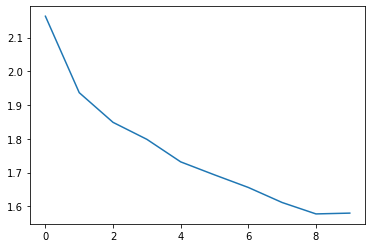

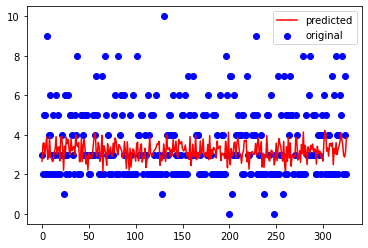

In [ ]:
#not kfold
from google.colab import drive
import os
import cv2
import numpy as np
import pandas as pd
import os
from google.colab import drive
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.losses import categorical_crossentropy
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.model_selection import train_test_split
import keras
from keras.layers import *
from keras.models import *
from keras import backend as K
import tensorflow as tf


def number_of_class_train(trainlist):
  listofclass=[]
  cunt=[0,0,0,0,0,0,0,0,0,0,0]
  for i in range(len(trainlist)):
    if trainlist[i]==0:
      cunt[0]=cunt[0]+1
    if trainlist[i]==1:
      cunt[1]=cunt[1]+1
    if trainlist[i]==2:
      cunt[2]=cunt[2]+1
    if trainlist[i]==3:
      cunt[3]=cunt[3]+1
    if trainlist[i]==4:
      cunt[4]=cunt[4]+1
    if trainlist[i]==5:
      cunt[5]=cunt[5]+1
    if trainlist[i]==6:
      cunt[6]=cunt[6]+1
    if trainlist[i]==7:
      cunt[7]=cunt[7]+1
    if trainlist[i]==8:
      cunt[8]=cunt[8]+1
    if trainlist[i]==9:
      cunt[9]=cunt[9]+1
    if trainlist[i]==10:
      cunt[10]=cunt[10]+1

  for j in range(11):
    listofclass.append(cunt[j])

  return listofclass




drive.mount('/content/gdrive')
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/min"
path = "/content/gdrive/My Drive/min"
files = os.listdir(path)
size = len(files)

ages = []
genders = []
images =[]
def displayImage(image):
    plt.imshow(image)
    plt.show()

for file in files:

    image = cv2.imread( path+'/'+file,cv2.IMREAD_COLOR)
    image = cv2.resize(image,dsize=(64,64))
    image = image.reshape((image.shape[0],image.shape[1],3))
    images.append(image)
    split_var = file.split('_')
    ages.append(split_var[0])
    genders.append(int(split_var[1]) )


idx = 44
sample = images[idx]
print("Age:",ages[idx])
def age_group(age):
    if age >=0 and age < 10:
        return 0
    elif 10<=age < 20:
        return 1
    elif 20<=age < 30:
        return 2
    elif 30<=age < 40:
      return 3
    elif 40<=age < 50:
      return 4
    elif 50<=age < 60:
      return 5
    elif 60<=age < 70:
      return 6
    elif 70<=age < 80:
      return 7
    elif 80<=age < 90:
      return 8
    elif 90<=age < 100:
      return 9
    else:
        return 10


target = []
features = np.zeros((size,sample.shape[0],sample.shape[1],3),dtype = 'float32')
for i in range(size):
#    target[i,0] = age_group(int(ages[i])) / 10
    target.append(age_group(int(ages[i])))

    features[i] = images[i]



print("lisage",target)
features = features / 255
display(sample)

x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.1,stratify=target,shuffle  = True)


training_padded = np.array(x_train,np.float64)
print('training_padded',training_padded)
training_labels= np.array(y_train,np.float64)
print('training_labels',training_labels)
testing_padded = np.array(x_test,np.float64)
print('testing_padded',testing_padded)
testing_labels= np.array(y_test,np.float64)
print('testing_labels',testing_labels)

def euc_dist_keras(y_test, peredict_target):
    return K.sqrt(K.sum(K.square(y_test - peredict_target), axis=-1, keepdims=True))

inputs = Input(shape=(64,64,3))
conv1 = Conv2D(32, kernel_size=(3, 3),activation='relu')(inputs)
conv2 = Conv2D(64, kernel_size=(3, 3),activation='relu')(conv1)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv2)
conv3 = Conv2D(128, kernel_size=(3, 3),activation='relu')(pool1)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv3)
x = Dropout(0.25)(pool2)
flat = Flatten()(x)

dropout = Dropout(0.5)
age_model = Dense(128, activation='relu')(flat)
age_model = dropout(age_model)
age_model = Dense(64, activation='relu')(age_model)
age_model = dropout(age_model)
age_model = Dense(32, activation='relu')(age_model)
age_model = dropout(age_model)
age_model = Dense(1, activation='relu')(age_model)

print("ytrain",y_train)
print("number of class in ytrain",number_of_class_train(y_train))
print("ytest",y_test)
print("number of class in ytest",number_of_class_train(y_test))
#print("x_train",x_train)
print("x_train.shape",x_train.shape)
#print("x_test",x_test)
print("x_test.shape",x_test.shape)
from keras.utils import np_utils
trainY=tf.keras.utils.to_categorical(y_train, num_classes=11, dtype='float32')
testY=tf.keras.utils.to_categorical(y_test, num_classes=11, dtype='float32')
#print("trainY",trainY)
#print("testY",testY)
print("age_model",age_model)
model = Model(inputs=inputs, outputs=[age_model])
model.compile(optimizer ='SGD', loss =euc_dist_keras, metrics='acc')
#model.compile(optimizer='sgd',loss=categorical_crossentropy,metrics=[tf.keras.metrics.Recall()])
print('xxx',training_padded.shape)
print('yyyy',training_labels.shape)
print('xxx',training_padded)
print('yyyy',training_labels)
network_hist=model.fit(training_padded,training_labels,batch_size=128,epochs=10)
loss_hist=network_hist.history['loss']

peredict_target=model.predict(x_test)


print("per",peredict_target)
print('ytest',y_test)
x=peredict_target.shape
print("pershap",x)
#print("y",testY)
print('\n')
model.evaluate(testing_padded,testing_labels)
print(model.evaluate)



from sklearn.metrics import mean_absolute_error,mean_squared_error
import math
print("MAE",mean_absolute_error(y_test,peredict_target))

mse =mean_squared_error(y_test, peredict_target)
mse1=mean_squared_error(y_test, peredict_target, squared=True)
print("mse",mse)
print("mse1",mse1)
rmse = math.sqrt(mse)
print('rmse',rmse)


import matplotlib

import matplotlib.pyplot as plt
plt.plot(loss_hist,label="loss")
#plt.plot(valloss_hist)
plt.xlabel='epoch'
plt.ylabel='loss'
plt.figure()
yhat=peredict_target
x=[]
for i in range(len(y_test)):
  x.append(i)

print(x)

plt.scatter(x, y_test, color="blue", label="original")
plt.plot(x, yhat, color="red", label="predicted")
plt.legend()
plt.show()

In [ ]:
a = np.arange(12).reshape(4,3) + 10
ind = np.unravel_index(np.argmax(a, axis=1), a.shape)
print(ind)
print(a)

(array([0, 0, 0, 0]), array([2, 2, 2, 2]))
[[10 11 12]
 [13 14 15]
 [16 17 18]
 [19 20 21]]


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.1,stratify=target,shuffle  = True)

In [ ]:
#using kfold coupy
from google.colab import drive
import os
import cv2
import numpy as np
import pandas as pd
import os
from google.colab import drive
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.losses import categorical_crossentropy
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.model_selection import train_test_split
import keras
from keras.layers import *
from keras.models import *
from keras import backend as K
import tensorflow as tf


def number_of_class_train(trainlist):
  listofclass=[]
  cunt=[0,0,0,0,0,0,0,0,0,0,0]
  for i in range(len(trainlist)):
    if trainlist[i]==0:
      cunt[0]=cunt[0]+1
    if trainlist[i]==1:
      cunt[1]=cunt[1]+1
    if trainlist[i]==2:
      cunt[2]=cunt[2]+1
    if trainlist[i]==3:
      cunt[3]=cunt[3]+1
    if trainlist[i]==4:
      cunt[4]=cunt[4]+1
    if trainlist[i]==5:
      cunt[5]=cunt[5]+1
    if trainlist[i]==6:
      cunt[6]=cunt[6]+1
    if trainlist[i]==7:
      cunt[7]=cunt[7]+1
    if trainlist[i]==8:
      cunt[8]=cunt[8]+1
    if trainlist[i]==9:
      cunt[9]=cunt[9]+1
    if trainlist[i]==10:
      cunt[10]=cunt[10]+1

  for j in range(11):
    listofclass.append(cunt[j])

  return listofclass



def to_classification(connected_predict):
  disjointed=[]
  for i in range(len(connected_predict)):
    if 0.5 >connected_predict[i]>=0:
      disjointed.append(0)
    elif 1>connected_predict[i]>=0.5:
      disjointed.append(1)
    elif 1.5>connected_predict[i]>=1:
      disjointed.append(1)
    elif 2>connected_predict[i]>=1.5:
      disjointed.append(2)
    elif 2.5>connected_predict[i]>=2:
      disjointed.append(2)
    elif 3>connected_predict[i]>=2.5:
      disjointed.append(3)
    elif 3.5>connected_predict[i]>=3:
      disjointed.append(3)
    elif 4>connected_predict[i]>=3.5:
      disjointed.append(4)
    elif 4.5>connected_predict[i]>=4:
      disjointed.append(4)
    elif 5>connected_predict[i]>=4.5:
      disjointed.append(5)
    elif 5.5>connected_predict[i]>=5:
      disjointed.append(5)
    elif 6>connected_predict[i]>=5.5:
      disjointed.append(6)
    elif 6.5>connected_predict[i]>=6:
      disjointed.append(6)
    elif 7>connected_predict[i]>=6.5:
      disjointed.append(7)
    elif 7.5>connected_predict[i]>=7:
      disjointed.append(7)
    elif 8>connected_predict[i]>=7.5:
      disjointed.append(8)
    elif 8.5>connected_predict[i]>=8:
      disjointed.append(8)
    elif 9>connected_predict[i]>=8.5:
      disjointed.append(9)
    elif 9.5>connected_predict[i]>=9:
      disjointed.append(9)
    else:
      disjointed.append(10)

  return disjointed







drive.mount('/content/gdrive')
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/min"
path = "/content/gdrive/My Drive/min"
files = os.listdir(path)
size = len(files)

ages = []
genders = []
images =[]
def displayImage(image):
    plt.imshow(image)
    plt.show()

for file in files:

    image = cv2.imread( path+'/'+file,cv2.IMREAD_COLOR)
    image = cv2.resize(image,dsize=(64,64))
    image = image.reshape((image.shape[0],image.shape[1],3))
    images.append(image)
    split_var = file.split('_')
    ages.append(split_var[0])
    genders.append(int(split_var[1]) )


idx = 44
sample = images[idx]
print("Age:",ages[idx])
def age_group(age):
    if 0<=age < 30:
        return 0
    elif 30<=age < 40:
      return 1
    elif 40<=age < 50:
      return 2
    elif 50<=age < 60:
      return 3
    elif 60<=age < 70:
      return 4
    elif 70<=age < 80:
      return 5
    else:
      return 6



target = []
features = np.zeros((size,sample.shape[0],sample.shape[1],3),dtype = 'float32')
for i in range(size):
#    target[i,0] = age_group(int(ages[i])) / 10
    target.append(age_group(int(ages[i])))

    features[i] = images[i]



print("lisage",target)
features = features / 255
display(sample)
def euc_dist_keras(y_test, peredict_target):
    return K.sqrt(K.sum(K.square(y_test - peredict_target), axis=-1, keepdims=True))

x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.1,stratify=target,shuffle  = True)
num_folds=10
from sklearn.model_selection import KFold
inputs = np.concatenate((x_train, x_test), axis=0)
targets = np.concatenate(( y_train, y_test), axis=0)
kfold = KFold(n_splits=num_folds, shuffle=False)

# K-fold Cross Validation model evaluation
fold_no = 1
for train, test in kfold.split(inputs, targets):

  # Define the model architecture
  training_padded = np.array(x_train,np.float64)
  print('training_padded',training_padded)
  training_labels= np.array(y_train,np.float64)
  print('training_labels',training_labels)
  testing_padded = np.array(x_test,np.float64)
  print('testing_padded',testing_padded)
  testing_labels= np.array(y_test,np.float64)
  print('testing_labels',testing_labels)
  inputs = Input(shape=(64,64,3))
  conv1 = Conv2D(32, kernel_size=(3, 3),activation='relu')(inputs)
  conv2 = Conv2D(64, kernel_size=(3, 3),activation='relu')(conv1)
  pool1 = MaxPooling2D(pool_size=(2, 2))(conv2)
  x = Dropout(0.25)(pool1)
  flat = Flatten()(x)
  dropout = Dropout(0.5)
  age_model = Dense(2, activation='relu')(flat)
  age_model = dropout(age_model)
  age_model = Dense(1, activation='softmax')(age_model)
  print("ytrain",y_train)
  print("number of class in ytrain",number_of_class_train(y_train))
  print("ytest",y_test)
  print("number of class in ytest",number_of_class_train(y_test))
  print("x_train.shape",x_train.shape)
  print("x_test.shape",x_test.shape)
  print("age_model",age_model)
  model = Model(inputs=inputs, outputs=[age_model])
  model.compile(optimizer ='SGD', loss =euc_dist_keras, metrics='acc')
  print('xxx',training_padded.shape)
  print('yyyy',training_labels.shape)
  print('xxx',training_padded)
  print('yyyy',training_labels)
  network_hist=model.fit(training_padded,training_labels,batch_size=128,epochs=300)
  fold_no = fold_no + 1
loss_hist=network_hist.history['loss']

peredict_target=model.predict(x_test)


print("per",peredict_target)
print('ytest',y_test)
x=peredict_target.shape
print("pershap",x)
#print("y",testY)
print('\n')
model.evaluate(testing_padded,testing_labels)
print(model.evaluate)

classification_predict=[]
classification_predict=to_classification(peredict_target)
print("per",peredict_target)
print('y_test',y_test)
print("classification_predict=",classification_predict)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,classification_predict)
print('confusion_matrix:')
print(cm)


from sklearn.metrics import mean_absolute_error,mean_squared_error
import math
print("MAE",mean_absolute_error(y_test,peredict_target))

mse =mean_squared_error(y_test, peredict_target)
mse1=mean_squared_error(y_test, peredict_target, squared=True)
print("mse",mse)
print("mse1",mse1)
rmse = math.sqrt(mse)
print('rmse',rmse)


import matplotlib

import matplotlib.pyplot as plt
plt.plot(loss_hist,label="loss")
#plt.plot(valloss_hist)
plt.xlabel='epoch'
plt.ylabel='loss'
plt.figure()
yhat=peredict_target
x=[]
for i in range(len(y_test)):
  x.append(i)

print(x)

plt.scatter(x, y_test, color="blue", label="original")
plt.plot(x, yhat, color="red", label="predicted")
plt.legend()
plt.show()

Mounted at /content/gdrive
Age: 31
lisage [0, 0, 2, 0, 1, 1, 1, 0, 4, 0, 0, 2, 2, 1, 0, 3, 0, 2, 2, 1, 0, 1, 4, 1, 0, 3, 3, 3, 0, 0, 0, 3, 0, 2, 0, 2, 1, 0, 3, 0, 3, 5, 3, 3, 1, 0, 3, 2, 3, 3, 3, 0, 0, 3, 1, 3, 2, 0, 1, 3, 3, 0, 0, 1, 0, 3, 3, 0, 0, 3, 0, 0, 0, 0, 1, 0, 3, 0, 1, 1, 1, 4, 3, 3, 0, 0, 1, 0, 0, 1, 5, 0, 0, 1, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 1, 2, 2, 2, 2, 3, 1, 2, 2, 3, 2, 2, 2, 3, 0, 2, 2, 0, 1, 0, 1, 3, 0, 2, 0, 0, 2, 3, 1, 2, 1, 0, 1, 1, 2, 1, 1, 0, 1, 1, 1, 3, 1, 4, 2, 1, 1, 1, 0, 0, 3, 4, 0, 0, 1, 0, 1, 4, 0, 0, 3, 1, 1, 0, 2, 2, 3, 0, 1, 1, 0, 3, 0, 2, 1, 3, 4, 3, 3, 2, 1, 4, 4, 3, 3, 1, 3, 3, 0, 5, 0, 2, 2, 1, 0, 0, 3, 2, 0, 3, 1, 0, 1, 4, 0, 1, 0, 1, 0, 4, 1, 0, 0, 1, 1, 1, 0, 4, 0, 3, 3, 3, 1, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

array([[[ 59, 173, 120],
        [ 55, 173, 120],
        [ 59, 176, 122],
        ...,
        [121, 201, 170],
        [137, 209, 180],
        [145, 211, 182]],

       [[ 64, 178, 125],
        [ 60, 178, 125],
        [ 61, 178, 125],
        ...,
        [106, 198, 159],
        [107, 200, 160],
        [110, 202, 162]],

       [[ 70, 184, 131],
        [ 66, 184, 131],
        [ 67, 184, 131],
        ...,
        [106, 201, 155],
        [108, 205, 159],
        [107, 206, 159]],

       ...,

       [[224, 246, 238],
        [232, 247, 240],
        [216, 228, 222],
        ...,
        [243, 244, 242],
        [226, 227, 217],
        [234, 235, 218]],

       [[234, 236, 227],
        [243, 241, 233],
        [232, 233, 228],
        ...,
        [242, 243, 241],
        [225, 226, 216],
        [235, 236, 219]],

       [[220, 240, 228],
        [235, 251, 240],
        [226, 237, 227],
        ...,
        [245, 252, 249],
        [235, 241, 231],
        [236, 242, 225]]

training_padded [[[[0.26274511 0.31764707 0.30980393]
   [0.26274511 0.31764707 0.30980393]
   [0.26274511 0.31764707 0.30980393]
   ...
   [0.27450982 0.32941177 0.32156864]
   [0.27450982 0.32941177 0.32156864]
   [0.27450982 0.32941177 0.32156864]]

  [[0.26274511 0.31764707 0.30980393]
   [0.26274511 0.31764707 0.30980393]
   [0.26274511 0.31764707 0.30980393]
   ...
   [0.27450982 0.32941177 0.32156864]
   [0.27450982 0.32941177 0.32156864]
   [0.27450982 0.32941177 0.32156864]]

  [[0.25882354 0.3137255  0.30588236]
   [0.25882354 0.3137255  0.30588236]
   [0.25882354 0.3137255  0.30588236]
   ...
   [0.27843139 0.33333334 0.32549021]
   [0.27450982 0.32941177 0.32156864]
   [0.27058825 0.32549021 0.31764707]]

  ...

  [[0.70588237 0.82352942 0.80784315]
   [0.72156864 0.86274511 0.8392157 ]
   [0.64705884 0.78039217 0.75686276]
   ...
   [0.76862746 0.88235295 0.86274511]
   [0.77254903 0.90588236 0.88235295]
   [0.7764706  0.90196079 0.88235295]]

  [[0.75686276 0.87450981 0.8